In [1]:
import pandas as pd
import numpy as np

# Importing Dataset

In [2]:
dataset = pd.read_csv("Apps.csv")

df = pd.DataFrame(dataset)

df.head()



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Update,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2017,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018,1.1,4.4 and up


# Replacing Column Name

In [3]:
# listing existing name
ls =  list(df)
ls

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Update',
 'Current Ver',
 'Android Ver']

In [4]:
# replacing the name with
df.columns = ['app',
 'category',
 'rating',
 'reviews',
 'size',
 'installs',
 'type',
 'price',
 'content_rating',
 'genres',
 'last_update',
 'current_ver',
 'android_Ver']

list(df)

['app',
 'category',
 'rating',
 'reviews',
 'size',
 'installs',
 'type',
 'price',
 'content_rating',
 'genres',
 'last_update',
 'current_ver',
 'android_Ver']

In [5]:
# Category and Genres column are similar in the dataset

df.drop(columns=['genres'],inplace= True)


# Handling NaN Values

### handling NaN values of 'rating' feature

In [6]:
# getting sum of all NaN Values in the all coulumns
df.isna().sum()

# [or]
# # can find the column name having null value more than 0
# for f in df.columns:
#     if df[f].isna().sum() > 0:
    
#         print (f)

app                  0
category             0
rating            1474
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       1
last_update          0
current_ver          8
android_Ver          3
dtype: int64

In [7]:
# displaying only NaN values in 'rating'.
df.rating[df.rating.isna()]


23      NaN
113     NaN
123     NaN
126     NaN
129     NaN
         ..
10824   NaN
10825   NaN
10831   NaN
10835   NaN
10838   NaN
Name: rating, Length: 1474, dtype: float64

<AxesSubplot:>

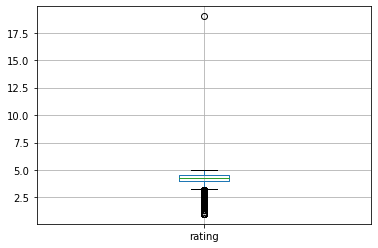

In [8]:
# replacing the nan values:
# in order to use mean, median we have to check for the outliers, if outleirs exist we have to use median not mean.
# Using 'Box plot' for Ouliers detection

import matplotlib.pyplot as plt
%matplotlib inline

df.boxplot(column=['rating'])

In [9]:
df.rating[df.rating>5.0]


10472    19.0
Name: rating, dtype: float64

In [10]:
# replacing the NaN values in 'rating' with the median
# inplace is used to add the changes into the real dataset df 
df.rating.fillna(value = df.rating.median(), inplace=True)
df.isna().sum()

app               0
category          0
rating            0
reviews           0
size              0
installs          0
type              1
price             0
content_rating    1
last_update       0
current_ver       8
android_Ver       3
dtype: int64

### handling NaN values of 'type' feature

In [11]:
df.nunique()

app               9660
category            34
rating              40
reviews           6002
size               462
installs            22
type                 3
price               93
content_rating       6
last_update          9
current_ver       2784
android_Ver         33
dtype: int64

In [12]:
# unique/distinct values of 'type' colunmn
df.type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [13]:
# number of NaN values in 'type' column
df.type.isna().sum()

1

In [14]:
# Number of unique values in 'type' column

df.pivot_table(index=['type'], aggfunc= 'size')

# [or] using iterating method

# count=0
# for i in df['type']:
#     if i == 'Free' :
#         count +=1
    
#     else:
#         continue
# print(count)

type
0           1
Free    10039
Paid      800
dtype: int64

In [15]:
# replacing '0' with Free
df.type.replace('0', 'Free',inplace=True)


In [16]:
df.pivot_table(index=['type'], aggfunc= 'size')

type
Free    10040
Paid      800
dtype: int64

In [17]:
# replacing the nan value of 'type' column with frequently occuring element that means using central tendency:mode
df.type.mode()

0    Free
Name: type, dtype: object

In [18]:
# df.type.fillna(value = df.type.mode(), inplace=True)

In [19]:
# replacing the nan value above fillna is not working thus going by this numpy method, replacing with 'mode' value
import numpy as np
df.type.replace(np.nan, 'Free',inplace=True)
df.isna().sum()

app               0
category          0
rating            0
reviews           0
size              0
installs          0
type              0
price             0
content_rating    1
last_update       0
current_ver       8
android_Ver       3
dtype: int64

In [20]:
# # handling categorical value of 'type variable'

# #  0 -> Free
# #  1 -> Paid

# df['type'] = df['type'].map({'Free': 0, 'Paid': 1})
# df.head()

# # no need of doing thia

### handling NaN values of 'content_rating' feature

In [21]:
df.content_rating.mode()

0    Everyone
Name: content_rating, dtype: object

In [22]:
df.content_rating.replace(np.nan, 'Everyone', inplace= True)

In [23]:
df.isna().sum()

app               0
category          0
rating            0
reviews           0
size              0
installs          0
type              0
price             0
content_rating    0
last_update       0
current_ver       8
android_Ver       3
dtype: int64

### handling NaN values of 'current__ver' feature

In [24]:
df.current_ver.mode()

0    Varies with device
Name: current_ver, dtype: object

In [25]:
# replacing the nan
df.current_ver.replace(np.nan, 'Varies with device', inplace=True)

df.isna().sum()

app               0
category          0
rating            0
reviews           0
size              0
installs          0
type              0
price             0
content_rating    0
last_update       0
current_ver       0
android_Ver       3
dtype: int64

### handling NaN values of 'android__ver' feature

In [26]:
df.android_Ver.mode()

0    4.1 and up
Name: android_Ver, dtype: object

In [27]:
df.android_Ver.fillna(value = '4.1 and up', inplace=True)

In [28]:
df.isna().sum()

app               0
category          0
rating            0
reviews           0
size              0
installs          0
type              0
price             0
content_rating    0
last_update       0
current_ver       0
android_Ver       0
dtype: int64

# Changing Dtypes

 - feature Engineering over column **[rating, reviews, installs, price]** to convert them from object type to numeric in order 

In [29]:
df.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,last_update,current_ver,android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,2018,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,2017,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,2018,1.1,4.4 and up


In [30]:
df.corr()

,rating,last_update
rating,1.00000,-0.03535
last_update,-0.03535,1.00000


 - we can see, we have only one varaible for correlation finding as of now that is rating bcz pd.corr() method automatically identifies the Int type variable.

 - So now analyzing the dataset once again inorder to find any possibilty to make any varaible to numberic in order have numeric-numeric relation.
 

In [31]:
# first analyzing how many numeric dtype we have
df.dtypes

app                object
category           object
rating            float64
reviews            object
size               object
installs           object
type               object
price              object
content_rating     object
last_update         int64
current_ver        object
android_Ver        object
dtype: object

In [32]:
df.reviews.values
# checking for the string value which makes this variable string instead it has lot of num
# checking and storing bool resul in new variable/column in demo
df['demo'] = df.reviews.str.contains("M")

df.head()



# checking if bool True exist in column demo, if answere/Output is True that means char 'M' exist in the review column
# by verifying from the excel sheet got to know we have only one value which is '3.0M' which makes the whole column
# string type instead of int, also u can check this by code:
# df["demo_col"] = df["reviews"].astype('int')
# above code converts the column into specified type, but running above code displays error saying '3.0M' cannot 
# be converted into string, 
print(True in df['demo'].values)

True


In further investigation over **excel**, found that the above problem arises because in the dataset all the values of the  specific (row number-10474) has shifted to left, thus the values of the current column is actually the value of the next column next to it (**Example : Column value of 'reviews' at (row-10474) is the value of 'size' column**). 

so in order to resolve this we have two options:
 - Remove that row
 - Make the correction through excel and reimport the dataset.

I choose to drop that specific row however reduction of one row won't hamper the computation because we have lots of data.

In [33]:
# finding the index number/row of the value to drop that
def find_index(str):
    
    index = 0
    for i in df.reviews:    
        if i == str:
            print("founded, the index/row is: ",index)
        index += 1
        
        
find_index('3.0M')

founded, the index/row is:  10472


In [34]:
# to verify above function
df.iloc[10472]

app               Life Made WI-Fi Touchscreen Photo Frame
category                                              1.9
rating                                               19.0
reviews                                              3.0M
size                                               1,000+
installs                                             Free
type                                                 Free
price                                            Everyone
content_rating                                   Everyone
last_update                                          2018
current_ver                                    4.0 and up
android_Ver                                    4.1 and up
demo                                                 True
Name: 10472, dtype: object

In [35]:
df.shape

(10841, 13)

In [36]:
# axis = 0  -> row
# axis = 1  -> column

df.drop(df.index[10472], inplace =True)
df.drop('demo',axis = 1,inplace = True)

# after droping index 10472 I have to reset the index
df = df.reset_index()
df.head()

,index,app,category,rating,reviews,size,installs,type,price,content_rating,last_update,current_ver,android_Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,2018,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,2017,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,2018,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,2018,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,2018,1.1,4.4 and up


In [37]:
df.head()

,index,app,category,rating,reviews,size,installs,type,price,content_rating,last_update,current_ver,android_Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,2018,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,2017,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,2018,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,2018,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,2018,1.1,4.4 and up


In [38]:
# df.price.replace("$","", inplace=True)

In [39]:
df.price.iloc[2202]

'2.99'

In [40]:
# Removed '+' from installs
df['installs'] = df['installs'].str.replace('\D', '', regex=True)
# r'\A$'

In [41]:
# NOW CONVERTING THE DTYPE OF APPROPRIATE COLUMN FROM OBJECT TO INT
df.reviews = df.reviews.astype(int)

df.rating = df.rating.astype(float)

df.installs = df.installs.astype(int)

df.price = df.price.astype(float)  # for removing '$' symbol, I have used excel, and then reimported the dataset

df.dtypes

index               int64
app                object
category           object
rating            float64
reviews             int32
size               object
installs            int32
type               object
price             float64
content_rating     object
last_update         int64
current_ver        object
android_Ver        object
dtype: object

# Inferences from Columns

In [42]:
from matplotlib import pyplot as plt
%matplotlib inline


In [43]:
df.columns


Index(['index', 'app', 'category', 'rating', 'reviews', 'size', 'installs',
       'type', 'price', 'content_rating', 'last_update', 'current_ver',
       'android_Ver'],
      dtype='object')

In [44]:
# groupby(....).size() -> .size() shows the occurence of the value/object in the group

### Ques1: 
Mostly which type of app is installed?

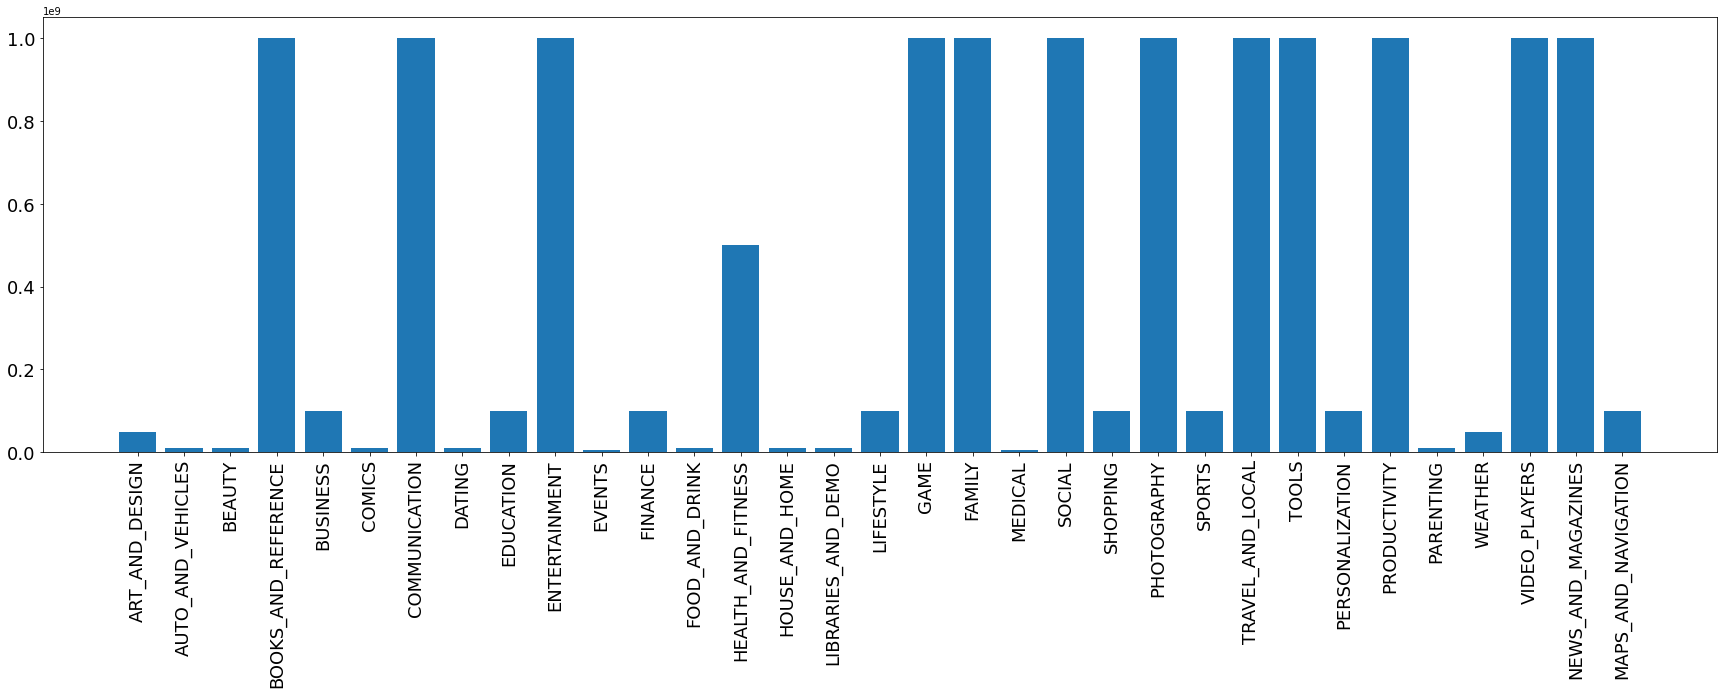

In [45]:

plt.rcParams["figure.figsize"] = [30, 8]

plt.bar(x= df['category'], height=df['installs'], width=0.8 )
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.show()

### Obervation:
#### Categoreris of most Installed apps are:
- BOOKS_AND_REFERENCE, COMMUNICATION, ENTERTAINMENT, GAME, FAMILY, SOCIAL, PHOTOGRAPHY, TRAVEL_AND_LOCAL, TOOLS, PRODUCTIVITY, VIDEO_PLAYERS, NEWS_AND_MAGZINES.

### Ques: 2
#### Most installed app category are for which age groups?


In [46]:
# Top Installed apps category

topCategory = ['BOOKS_AND_REFERENCE', 'COMMUNICATION', 'ENTERTAINMENT', 'GAME', 'FAMILY', 'SOCIAL', 'PHOTOGRAPHY', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PRODUCTIVITY', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES']


#### Segregating top installed app category and there content rating from main dataframe(df) for better analysis

In [47]:

ls1 = []
ls2 = []

for i in topCategory:
    index = 0
    for j in df['category']:
        
        if i == j:
#             print("{0},{1}".format(df['category'].iloc[index], df['content_rating'].iloc[index]))
            ls1.append(df['category'].iloc[index])    #append category value in list 'ls1'
            ls2.append(df['content_rating'].iloc[index])      #append conet_rating value in list 'ls2'
               
        elif i != j:
            pass
        
        index +=1

# get the list of tuples from two lists.
# and merge them by using zip().
list_of_tuples = list(zip(ls1, ls2))

# finaly created the new dataframe of most installed category app with content_rating
df_demo = pd.DataFrame(list_of_tuples,
                  columns=['category', 'content_rating'])

df_demo

,category,content_rating
0,BOOKS_AND_REFERENCE,Teen
1,BOOKS_AND_REFERENCE,Everyone
2,BOOKS_AND_REFERENCE,Everyone 10+
3,BOOKS_AND_REFERENCE,Everyone
4,BOOKS_AND_REFERENCE,Teen
...,...,...
6491,NEWS_AND_MAGAZINES,Teen
6492,NEWS_AND_MAGAZINES,Everyone
6493,NEWS_AND_MAGAZINES,Everyone
6494,NEWS_AND_MAGAZINES,Everyone


#### Now grouping the df_demo 

In [48]:
grp = df_demo.groupby(['category','content_rating']).size()
grp

category             content_rating
BOOKS_AND_REFERENCE  Everyone           202
                     Everyone 10+         5
                     Mature 17+           3
                     Teen                21
COMMUNICATION        Everyone           345
                     Mature 17+          10
                     Teen                32
ENTERTAINMENT        Everyone            39
                     Everyone 10+         5
                     Mature 17+           9
                     Teen                96
FAMILY               Everyone          1529
                     Everyone 10+       131
                     Mature 17+          50
                     Teen               261
                     Unrated              1
GAME                 Everyone           608
                     Everyone 10+       131
                     Mature 17+          74
                     Teen               331
NEWS_AND_MAGAZINES   Everyone           169
                     Everyone 10+       

#### Now to form stacked bar chart for the above grouped data we cannot directly use above group thus,  we have to form a new dataframe and insert the above groupby.size() value as data to each category,rating content.
 - so for this w'll be creating new excel sheet.
 - to make the job easier will make the table here and export as .xlxs and then for inserting value w'll do it excel.

In [49]:
mcolumn = df.content_rating.unique()

dataframe = pd.DataFrame(index = topCategory , columns = mcolumn)
dataframe


,Everyone,Teen,Everyone 10+,Mature 17+,Adults only 18+,Unrated
BOOKS_AND_REFERENCE,NaN,NaN,NaN,NaN,NaN,NaN
COMMUNICATION,NaN,NaN,NaN,NaN,NaN,NaN
ENTERTAINMENT,NaN,NaN,NaN,NaN,NaN,NaN
GAME,NaN,NaN,NaN,NaN,NaN,NaN
FAMILY,NaN,NaN,NaN,NaN,NaN,NaN
SOCIAL,NaN,NaN,NaN,NaN,NaN,NaN
PHOTOGRAPHY,NaN,NaN,NaN,NaN,NaN,NaN
TRAVEL_AND_LOCAL,NaN,NaN,NaN,NaN,NaN,NaN
TOOLS,NaN,NaN,NaN,NaN,NaN,NaN
PRODUCTIVITY,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# save the excel into the existing jupter python code directory
dataframe.to_excel('dataframe.xlsx', index = True)

In [51]:
# importing the csv_file
demo_df2 = pd.read_csv('dataframe_csv.csv')
demo_df2

# columns and its data
d = {'Teen':[21,32,96,261,331,12,9,125,5,6,24,34],
    'Everyone':[202,345,35,1529,608,318,413,101,835,251,146,169],
    'Everyone 10+':[5,0,5,131,131,0,1,2,0,0,2,66],
    'Mature 17+':[3,10,9,50,74,5,1,67,2,1,2,14],
    'Unrated':[0,0,0,1,0,0,0,0,1,0,0,0]}
demo = pd.DataFrame(index = topCategory, data = d )

demo

,Teen,Everyone,Everyone 10+,Mature 17+,Unrated
BOOKS_AND_REFERENCE,21,202,5,3,0
COMMUNICATION,32,345,0,10,0
ENTERTAINMENT,96,35,5,9,0
GAME,261,1529,131,50,1
FAMILY,331,608,131,74,0
SOCIAL,12,318,0,5,0
PHOTOGRAPHY,9,413,1,1,0
TRAVEL_AND_LOCAL,125,101,2,67,0
TOOLS,5,835,0,2,1
PRODUCTIVITY,6,251,0,1,0


<AxesSubplot:title={'center':'App category and content rating'}, xlabel='Category', ylabel='Content Rating'>

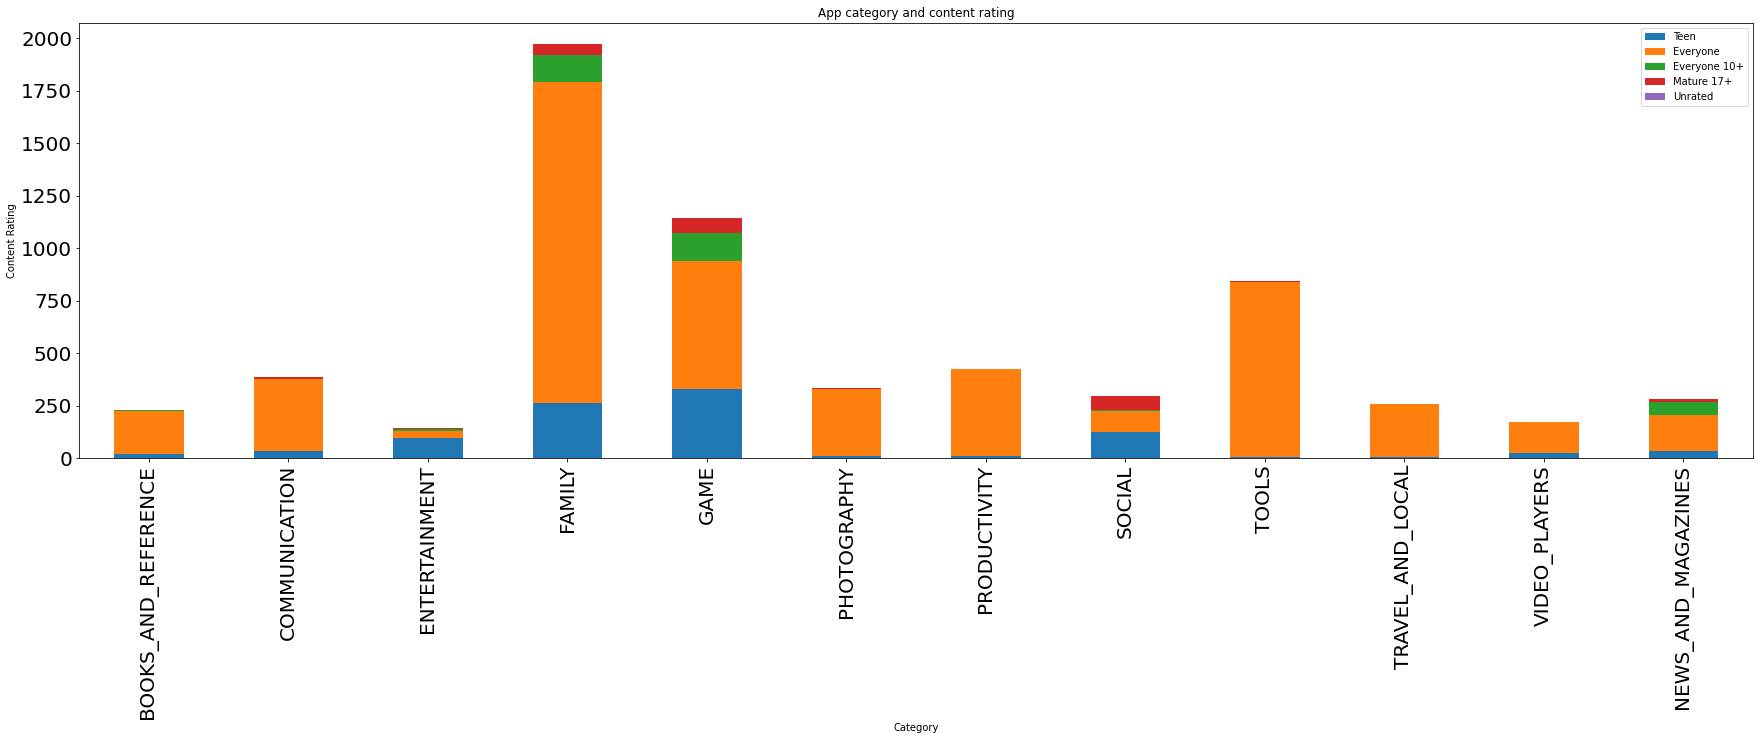

In [52]:
# plotting the stacked bar chart

demo_df2.plot(kind = 'bar', stacked = True, x = 'category', title = 'App category and content rating'
              , fontsize= 20, xlabel= 'Category', ylabel = 'Content Rating')

### Observation:
Most installed app category got the content rating as:


Rank - 1. "Everyone"  -> for all

Rank - 2. "Teen"      -> for Entertainment, Film, Game, Social 

Rank - 3. "Everyone 10+"  -> for Film, Game

Rank - 4. "Mature 17+"  -> for Film, Game, Social

**So, Most installed apps, targets all age group.**


### Ques: 3
#### Most number of apps on Google Play store are from which category?




In [53]:
group = df.groupby(['category','app']).size()
group.count

<bound method Series.count of category        app                                                                              
ART_AND_DESIGN  350 Diy Room Decor Ideas                                                             1
                3D Color Pixel by Number - Sandbox Art Coloring                                      1
                AJ Styles HD Wallpapers                                                              1
                AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper                                    1
                Ai illustrator viewer                                                                1
                                                                                                    ..
WEATHER         Yahoo Weather                                                                        1
                Yahoo! Weather for SH Forecast for understanding the approach of rain clouds Free    1
                Yandex.Weather                  

**Now counting the total app in each category:**
- For this will use groupby().get_group() to call specific category.
- Total rows of each category indicates count of apps in that category.
- **NOTE**:
    - One app can not be in more than one category.
    - Each category can not contain the duplicates of the app within it(Verify using groupby().size()).
    
*Below is just a demo for the above theory:*

In [54]:
max = df.groupby(['category']).get_group('ART_AND_DESIGN')

# this returns count of rows which consist of ART_AND_DESIGN category.
# count of rows tells us count of apps in this category.
len(max.index)


65

#### We performed above demo because pie chart wants the array of num value for variable x in number to divide each section, after then we can label each section as per our choice 

#### Now to perform the above demo over all the category inorder to find the count of apps in each category.

In [55]:
arr = df.category.unique()
arr

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [56]:
appCount_list = []

for i in arr:
    x = df.groupby('category').get_group(i)
    appCount_list.append(len(x.index))

print(appCount_list)

    

[65, 85, 53, 231, 460, 60, 387, 234, 156, 149, 64, 366, 127, 341, 88, 85, 382, 1144, 1972, 463, 295, 260, 335, 384, 258, 843, 392, 424, 60, 82, 175, 283, 137]


In [57]:
# to use in explode variable in pie chart
m = []
for i in appCount_list:
    if i == 843:
        m.append(1)
    else:
        m.append(0)
        
print(m)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


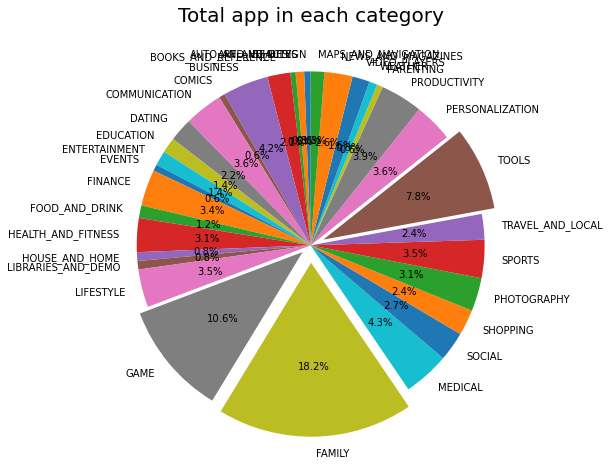

In [58]:
plt.pie(x =appCount_list, labels= arr, startangle= 90, autopct='%1.1f%%',
       explode =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.06, 0.1, 0, 0, 0, 0, 0, 0, 0.08, 0, 0, 0, 0, 0, 0, 0] )
# plt.xticks(rotation=90)
# plt.yticks()
plt.title('Total app in each category', fontsize = 20)
plt.show()

### Observation:
Most number of apps on Google Play store are from the category:

Rank - 1 -> Family

Rank - 2 -> Game

Rank - 3 -> Tools

### Ques 4:
#### Which category of app has the maximum number of ratings between 4.5  to 5.0?

In [59]:
df.groupby(['category', 'rating', 'reviews']).size()

category        rating  reviews
ART_AND_DESIGN  3.2     55         1
                3.4     486        1
                3.8     178        1
                        564        1
                        2206       1
                                  ..
WEATHER         4.7     14051      1
                        20001      1
                4.8     892        1
                        17493      1
                        159455     1
Length: 9003, dtype: int64

###  **TOP RATING CATEGORY [4.0 - 5.0]**

In [60]:
index = 0
lst_rating = []
lst_Categ = []
lst_Index = []

# looping inside the df.rating
for i in df.rating:
#     getting the values of rating between 4.5 and 5.0  
    if i>=4.0 and i<=5 :
        
#       now w'll get the categroy name and also print the rating at that index number
        lst_rating.append(df['rating'][index])
        lst_Categ.append(df['category'][index])
        lst_Index.append(index)
        
    index += 1
# here an error occured that is 10472 index doesn't exist this occured becz the row 
# which dropped earlier, I haven't reset the index. bcz of which just after  the 
# row 10471 df contains 10473.

# So now I have to reset df after droping the row.
# Now the changes done by using df.reset_index()


In [61]:
# Now will count the occurence of each category in list which is equivalent to the 
# occurence of rating between 4.0 and 5.0

# creating df_category list, with this element will loop into above lst_category list to count
df_cate_list = ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']


top_list = []

for i in df_cate_list:
    top_list.append(lst_Categ.count(i))

print(top_list)

[58, 67, 46, 202, 380, 42, 327, 165, 150, 108, 61, 289, 100, 295, 71, 69, 281, 995, 1564, 379, 260, 229, 282, 330, 197, 614, 360, 364, 51, 66, 120, 223, 97]


In [62]:
# verify above list val_list
lst_Categ.count('ART_AND_DESIGN')

58

What all things I got now:
- I have the category of app
- I founded the count of category having ratings (between 4.0 to 5.0) -> this can be replaceable, if you want to find ratings exactly 5.0 that can also be done

*Now plotting the bar graph*

<function matplotlib.pyplot.show(close=None, block=None)>

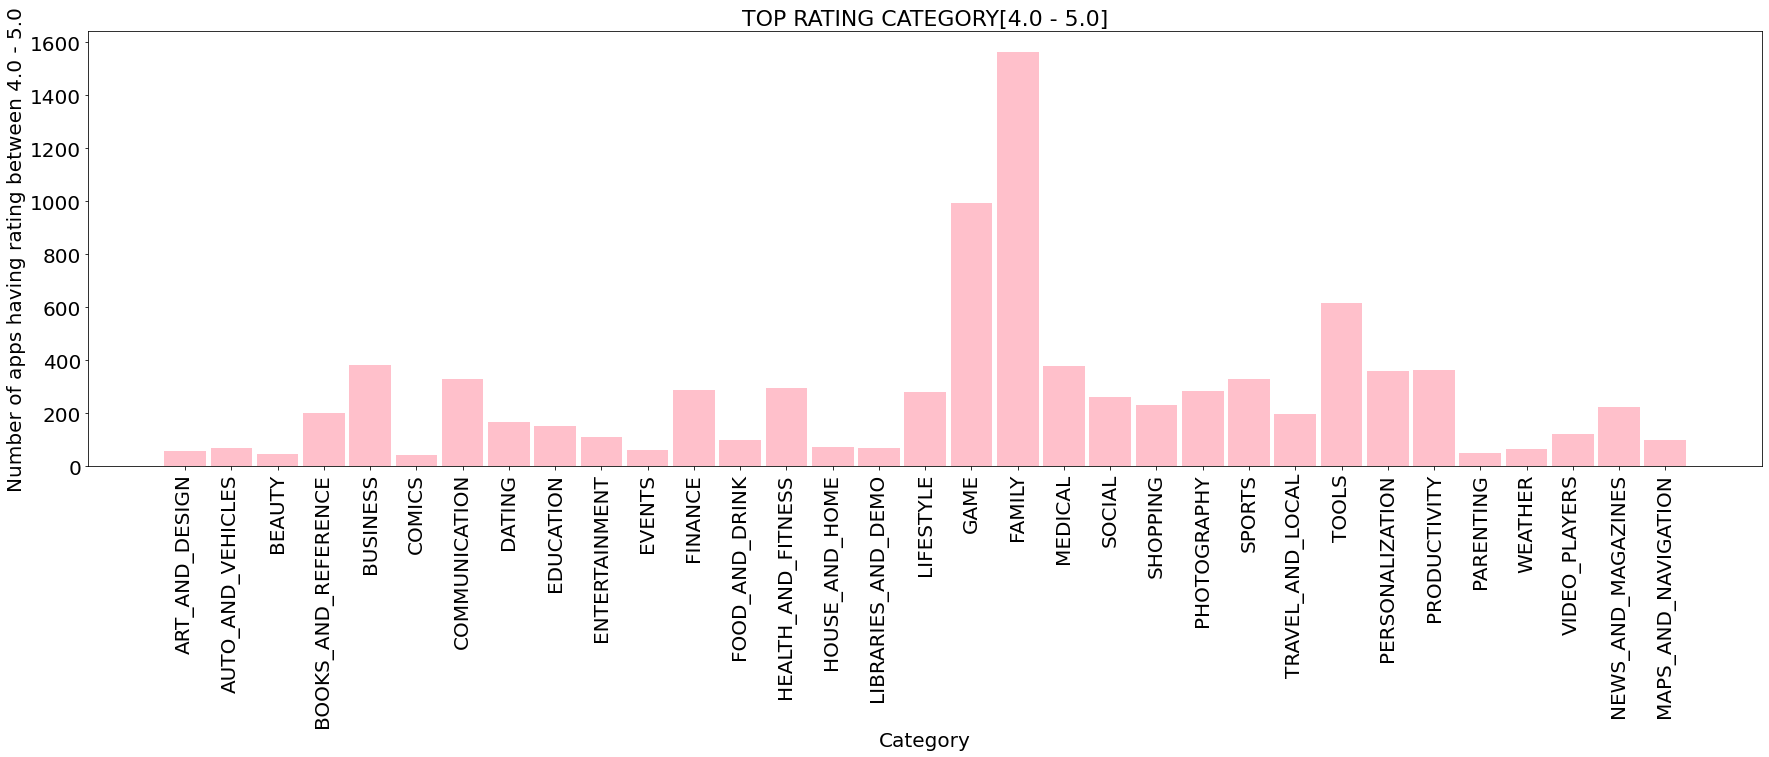

In [63]:
y_value = top_list

plt.bar(x= df_cate_list, height= y_value, width = 0.9, color=['pink'])
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20, rotation=0)
plt.xlabel('Category',fontsize = 20)
plt.ylabel('Number of apps having rating between 4.0 - 5.0', fontsize = 20)
plt.title('TOP RATING CATEGORY[4.0 - 5.0]' ,fontsize = 22)
plt.show

**Summary:**
*TOP RATING*
 - Rank - 1: FAMILY
 - Rank - 2: GAME
 - Rank - 3: TOOLS

###  **AVERAGE RATING CATEGORY [3.0 - 4.0]**

[7, 16, 7, 28, 63, 17, 54, 55, 6, 41, 2, 56, 24, 26, 16, 16, 78, 141, 365, 64, 32, 29, 42, 49, 55, 185, 31, 49, 8, 16, 49, 50, 34]


<function matplotlib.pyplot.show(close=None, block=None)>

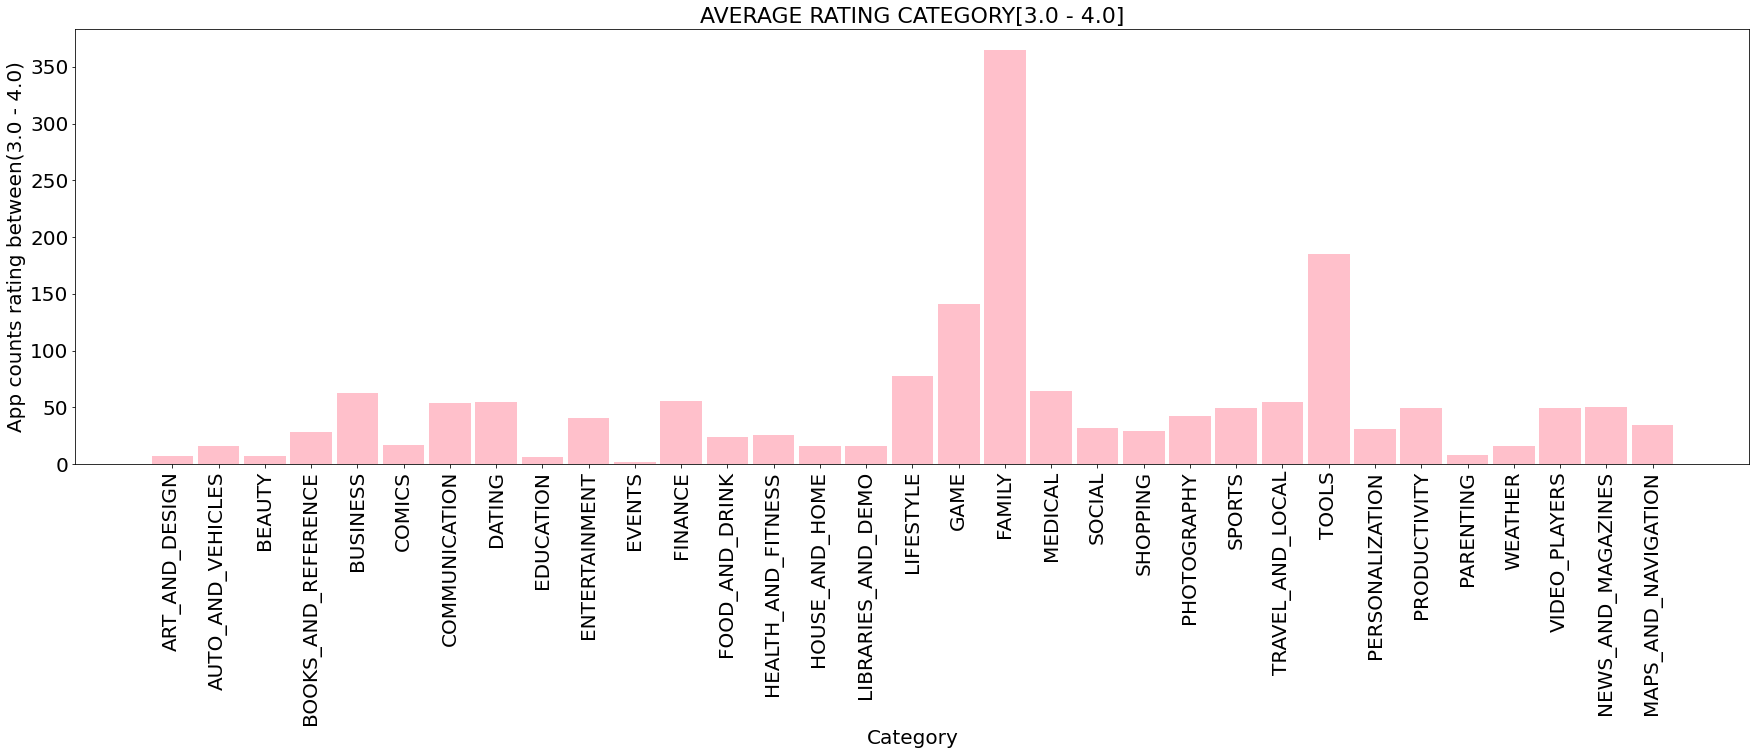

In [64]:
index = 0
lst_rating = []
lst_Categ = []
lst_Index = []

# looping inside the df.rating
for i in df.rating:
#     getting the values of rating between 4.5 and 5.0  
    if i>=3.0 and i<4.0 :
        
#       now w'll get the categroy name and also print the rating at that index number
        lst_rating.append(df['rating'][index])
        lst_Categ.append(df['category'][index])
        lst_Index.append(index)
        
    index += 1
# here an error occured that is 10472 index doesn't exist this occured becz the row 
# which dropped earlier, I haven't reset the index. bcz of which just after  the 
# row 10471 df contains 10473.

# So now I have to reset df after droping the row.
# Now the changes done by using df.reset_index()




# Now will count the occurence of each category in list which is equivalent to the 
# occurence of rating between 4.0 and 5.0

# creating df_category list, with this element will loop into above lst_category list to count
df_cate_list = ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']


avg_list = []

for i in df_cate_list:
    avg_list.append(lst_Categ.count(i))

print(avg_list)


y_value = avg_list

plt.bar(x= df_cate_list, height= y_value, width = 0.9, color=['pink'])
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20, rotation=0)
plt.xlabel('Category',fontsize = 20)
plt.ylabel('App counts rating between(3.0 - 4.0)', fontsize = 20)
plt.title('AVERAGE RATING CATEGORY[3.0 - 4.0]', fontsize=22)
plt.show

**Summary:**
*AVERAGE RATING*
 - Rank - 1: FAMILY
 - Rank - 2: TOOLS
 - Rank - 3: GAME

###  **MINIMUM RATING CATEGORY [2.0 - 3.0]**

[0, 2, 0, 1, 15, 1, 5, 10, 0, 0, 1, 16, 1, 19, 1, 0, 18, 6, 32, 16, 2, 1, 11, 4, 6, 35, 1, 8, 1, 0, 4, 9, 5]


<function matplotlib.pyplot.show(close=None, block=None)>

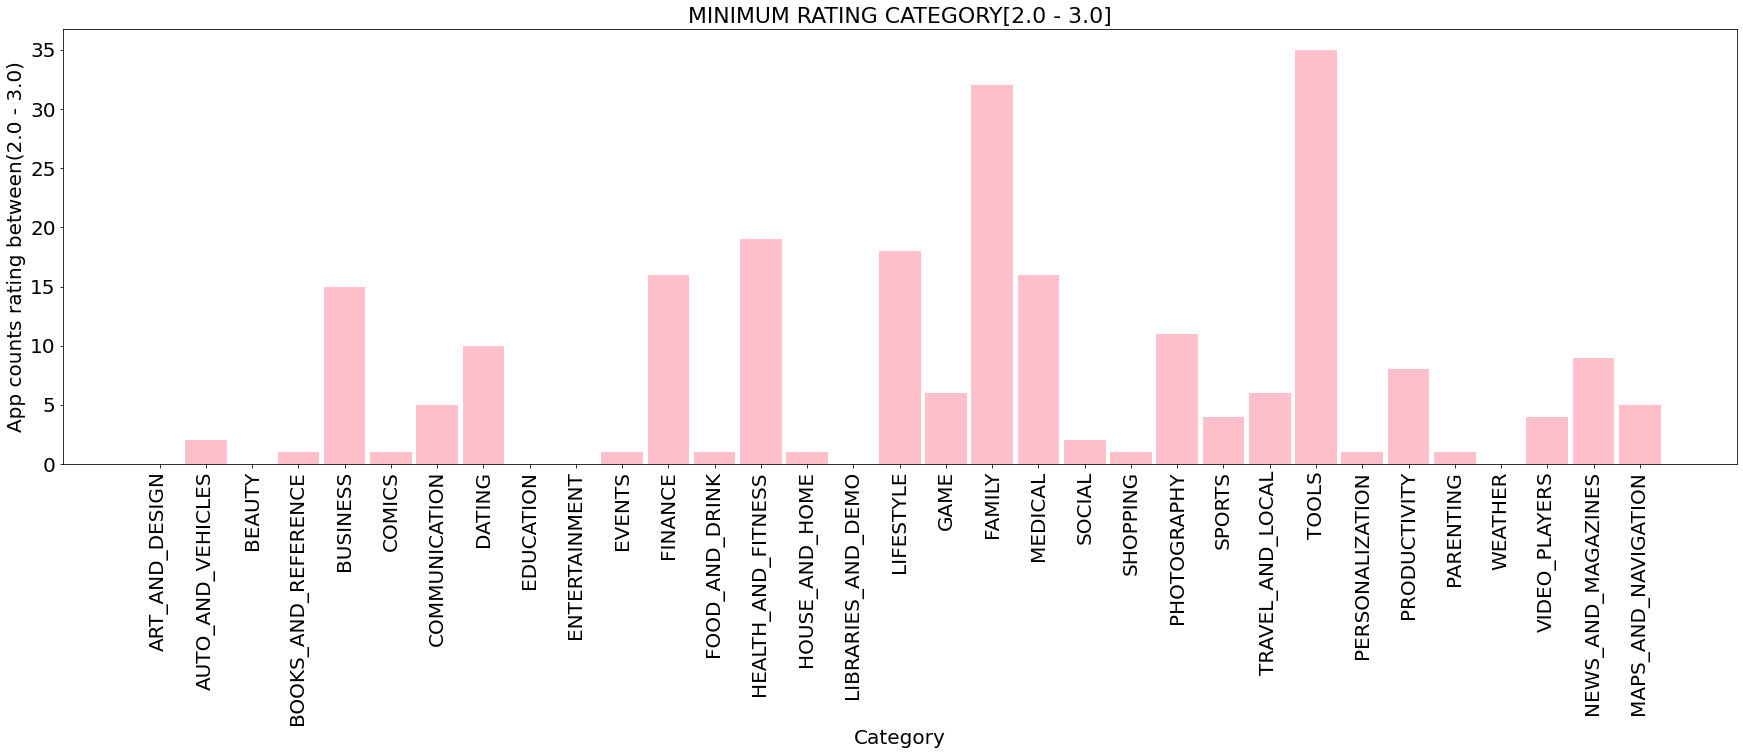

In [65]:
index = 0
lst_rating = []
lst_Categ = []
lst_Index = []

# looping inside the df.rating
for i in df.rating:
#     getting the values of rating between 4.5 and 5.0  
    if i>=2.0 and i<3.0 :
        
#       now w'll get the categroy name and also print the rating at that index number
        lst_rating.append(df['rating'][index])
        lst_Categ.append(df['category'][index])
        lst_Index.append(index)
        
    index += 1
# here an error occured that is 10472 index doesn't exist this occured becz the row 
# which dropped earlier, I haven't reset the index. bcz of which just after  the 
# row 10471 df contains 10473.

# So now I have to reset df after droping the row.
# Now the changes done by using df.reset_index()




# Now will count the occurence of each category in list which is equivalent to the 
# occurence of rating between 4.0 and 5.0

# creating df_category list, with this element will loop into above lst_category list to count
df_cate_list = ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']


min_list = []

for i in df_cate_list:
    min_list.append(lst_Categ.count(i))

print(min_list)


y_value = min_list

plt.bar(x= df_cate_list, height= y_value, width = 0.9, color=['pink'])
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20, rotation=0)
plt.xlabel('Category',fontsize = 20)
plt.ylabel('App counts rating between(2.0 - 3.0)', fontsize = 20)
plt.title('MINIMUM RATING CATEGORY[2.0 - 3.0]', fontsize=22)
plt.show

### Observation:
**Summary:**
*TOP RATING*
 - Rank - 1: FAMILY
 - Rank - 2: GAME
 - Rank - 3: TOOLS
 
 
**Summary:**
*AVERAGE RATING*
 - Rank - 1: FAMILY
 - Rank - 2: TOOLS
 - Rank - 3: GAME
 
 
 
**Summary:**
*MINIMUM RATING*
 - Rank - 1: TOOLS
 - Rank - 2: FAMILY
 - Rank - 3: HEALTH AND FITNESS
 - Rank - 4: LIFESTYLE
 - Rank - 5: FINANCE == MEDICAL

 

### Ques 3:
#### Price /costing visualization of top 3 category apps are?



In [66]:
df.price.max()

400.0

In [67]:
df.groupby(['category','price']).size()

category           price
ART_AND_DESIGN     0.00     62
                   1.99      3
AUTO_AND_VEHICLES  0.00     82
                   1.49      1
                   1.99      1
                            ..
WEATHER            2.99      3
                   3.99      1
                   4.49      1
                   5.99      1
                   6.99      1
Length: 306, dtype: int64

In [68]:
# wanted to create dataframe of category and price, having price > 0.


priceList = []
indList = []
categList = []
index = 0
        
for i in df['price']:
    if i >= 0.0:
        indList.append(index)
        priceList.append(df['price'][index])
        categList.append(df['category'][index])
    index += 1


In [69]:
#  now lets create new dataframe for further analysis:


# get the list of tuples from two lists.
# and merge them by using zip().
list_of_tuples = list(zip(categList, priceList))

# finaly created the new dataframe of most installed category app with content_rating
df_demo3 = pd.DataFrame(list_of_tuples,
                  columns=['category', 'price'], index =indList )

df_demo3.head()

,category,price
0,ART_AND_DESIGN,0.0
1,ART_AND_DESIGN,0.0
2,ART_AND_DESIGN,0.0
3,ART_AND_DESIGN,0.0
4,ART_AND_DESIGN,0.0


In [70]:
index  = 0
indlst = []
priclst = []
catelst = []

for i in df['category']:
    
    if i == 'FAMILY':
        indlst.append(index)
        priclst.append(df['price'][index])
        catelst.append(i)
    index+=1
    

<function matplotlib.pyplot.show(close=None, block=None)>

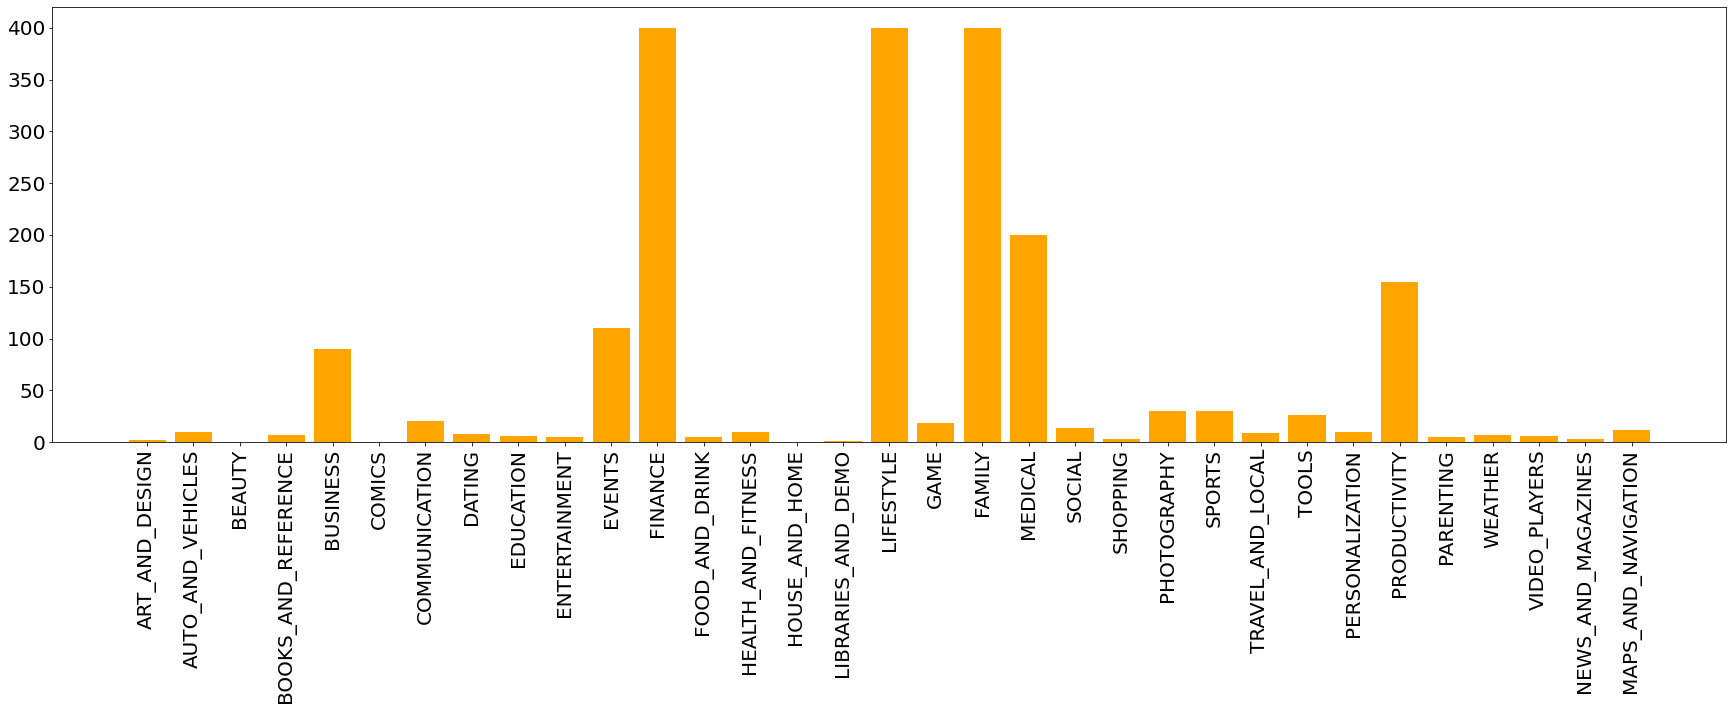

In [71]:
plt.bar(x = df_demo3['category'], height=df_demo3['price'], color=['orange'])
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20, rotation=0)
plt.show

### Observation:
 - With this we can say out of our top - 3 category apps people are ready purchase for FAMILY category much easily. but rest of our top category does not perform like GAME and TOOLS.
 
 - Rest we have new category like LIFESTYLE and  FINANCE these app also have pricing of 400.00, but this is just the price but as we saw earlier their rating and reviews were not so good. **Ultimately the deciding factors will be the number of installs** if these two category have the more than average number of installs for the app having the price 400.00  / 399.99 then we can consider these two new category as the category which can help to improve google play store.

**People are ready to pay costing around 400.00 / 399.99 dollars for the categories like**
 - Rank - 1: FAMILY
 - Rank - 2: LIFESTYLE
 - Rank - 3: FINANCE

**People are ready to pay costing around 50 - 200 dollars for the categories like**
 - Rank - 1: MEDICAL
 - Rank - 2: PRODCUTION
 - Rank - 3: EVENTS
 - Rank - 4: BUSINESS

## Ques: 5
Average number of installs of all the category app?


In [72]:
df.price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [73]:
pricelst = []
indList = []
categList = []
instList = []
index = 0
        
for i in df['price']:
    if i >= 370.99 :
        indList.append(index)
        pricelst.append(df['price'][index])
        categList.append(df['category'][index])
        instList.append(df['installs'][index])
    index += 1

In [74]:
count = 0
index = 0
for i in df['price']:
    if i == 400.00 :
        count +=1
        print("Index: ",index)
    index +=1
print("Count: ",count)
# print(index)
    
    


Index:  4367
Count:  1


 - **Only one value in the whole dataset has the price around 400.0 dollar**
 - Now lets see its details like: from which category it is, its installs...etc

 

In [75]:
df.iloc[4367]

index                                 4367
app               I'm Rich - Trump Edition
category                         LIFESTYLE
rating                                 3.6
reviews                                275
size                                  7.3M
installs                             10000
type                                  Paid
price                                400.0
content_rating                    Everyone
last_update                           2017
current_ver                          1.0.1
android_Ver                     4.1 and up
Name: 4367, dtype: object

In [76]:
#  now lets create new dataframe for further analysis:


# get the list of tuples from two lists.
# and merge them by using zip().
list_of_tuples = list(zip(categList, pricelst,instList))

# finaly created the new dataframe of most installed category app with content_rating
df_demo4 = pd.DataFrame(list_of_tuples,
                  columns=['category', 'price','installs'], index =indList )

df_demo4

,category,price,installs
4197,FAMILY,399.99,100
4362,LIFESTYLE,399.99,10000
4367,LIFESTYLE,400.00,10000
5351,LIFESTYLE,399.99,100000
5354,FAMILY,399.99,10000
5356,FINANCE,399.99,50000
5357,LIFESTYLE,379.99,1000
5358,FINANCE,399.99,1000
5359,FINANCE,399.99,5000
5362,FAMILY,399.99,5000


**Now gathering the data and visualizing the average installs of all the category**

In [77]:

from statistics import mean

# average installs of all category
inst_list = []
categList = df.category.unique()
year = []

for i in categList:
    
    x = df.groupby('category').get_group(i)
    inst_list.append(round(mean(x.installs)))
    
    year.append(x.last_update)

print("Catgeories: \n", categList)
print("\n")
print("Avegrage Installs of all catgeory: \n",inst_list)

print("\n")
print("year: \n",year)


Catgeories: 
 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Avegrage Installs of all catgeory: 
 [1912894, 625061, 513152, 8318050, 2178076, 934769, 84359887, 1129533, 5586231, 19256107, 249581, 2395215, 2156683, 4642441, 1917187, 741128, 1407444, 30669602, 5201959, 115027, 47694467, 12491726, 30114172, 4560350, 26623594, 13585732, 5932385, 33434178, 525352, 5196348, 35554301, 26488755, 5286729]


year: 
 [0       2018
1       2017
2       2018
3       2018
4       2018
        ... 
7174    2018
8679    2018
8712    2018
8871    2018
8888    2018
Name: last_update, Length

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           10840 non-null  int64  
 1   app             10840 non-null  object 
 2   category        10840 non-null  object 
 3   rating          10840 non-null  float64
 4   reviews         10840 non-null  int32  
 5   size            10840 non-null  object 
 6   installs        10840 non-null  int32  
 7   type            10840 non-null  object 
 8   price           10840 non-null  float64
 9   content_rating  10840 non-null  object 
 10  last_update     10840 non-null  int64  
 11  current_ver     10840 non-null  object 
 12  android_Ver     10840 non-null  object 
dtypes: float64(2), int32(2), int64(2), object(7)
memory usage: 1016.4+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

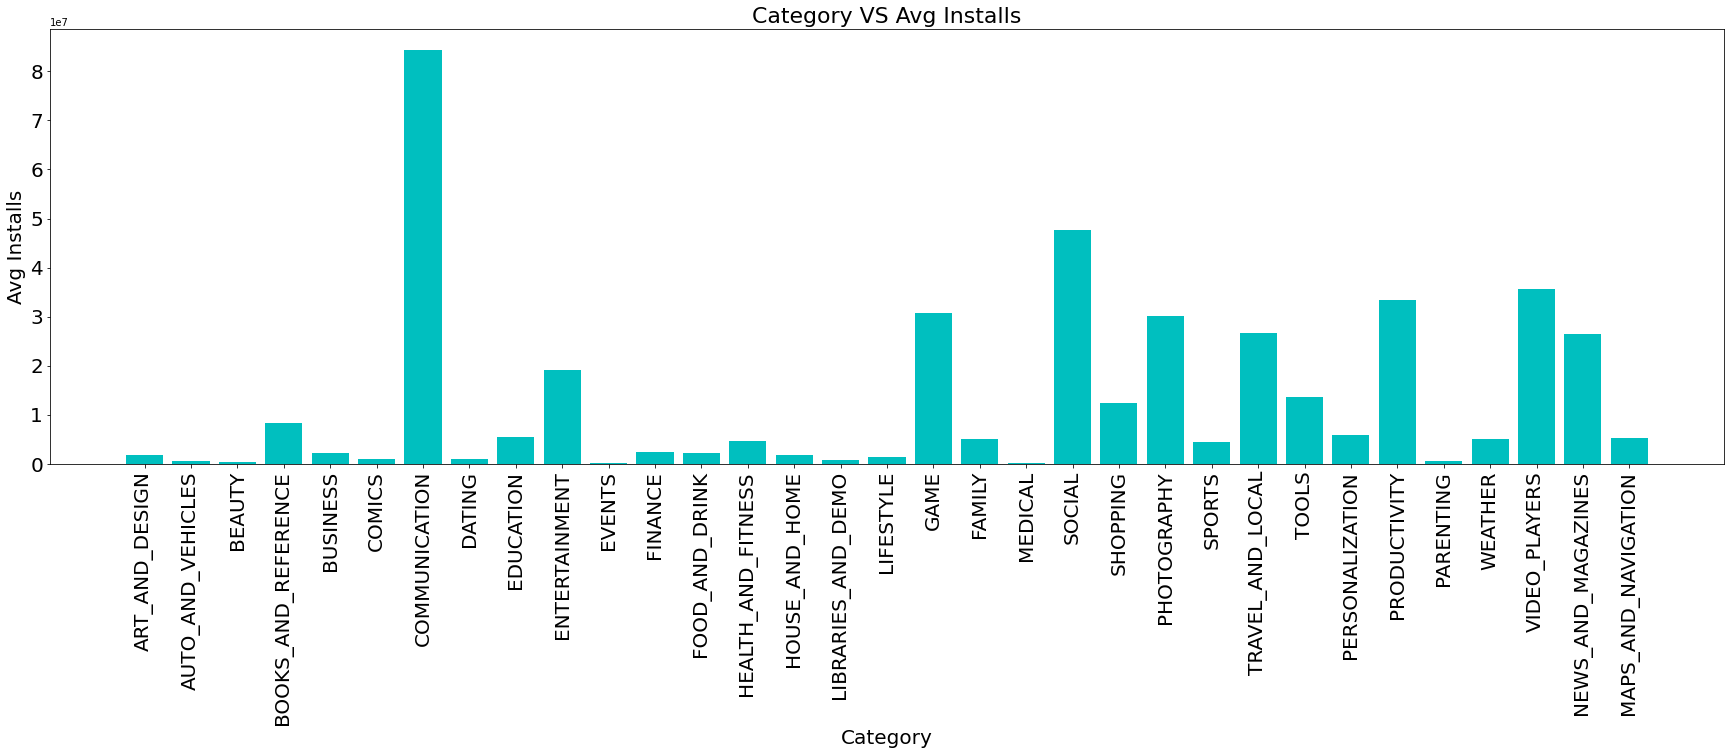

In [79]:
xAxis = categList
yAxis = inst_list

plt.bar(x = xAxis, height=yAxis, color=['c'])
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20, rotation=0)
plt.xlabel('Category', fontsize=20 )
plt.ylabel('Avg Installs', fontsize=20)
plt.title('Category VS Avg Installs', fontsize=22)
plt.show

### Observation:

Average Installs as per the visualization:
 - Rank - 1: COMMUNICATION
 - Rank - 2: SOCIAL
 - Rank - 3: VIDEO PLAYER
 - Rank - 4: PRODUCTIVITY
 - Rank - 5: GAME & SPORTS
 

*Average installs => COMMUNICATION > SOCIAL > VIDEO PLAYER > PRODUCTIVITY > GAME = SPORTS*


**From the past observation, average installs of all category following the trend completly different from reviews, rating, number of apps in each category**

 - So even though in visualisation one app from LIFESTYLE has the top installs 100K(greatest of all) but the average installs of LIFESTYLE is too lower than our top-5 category apps. 

 - In fact we got some new apps category which performing much better in terms of installs.

### Ques 6:
#### Count of Paid and Free apps in eah categories

In [80]:
categList = df.category.unique()
free_list = []
paid_list = []


for i in categList:
        x = df.groupby(['category']).get_group(i)
    
    #     free count
        value_free = x.type.value_counts().Free
        free_list.append(value_free)

    #     Paid count
        if 'Paid' in x.type.values:
            value_paid = x.type.value_counts().Paid
            paid_list.append(value_paid)
        else: 
            paid_list.append(0)



    
print('Free App Count: ', free_list)
print('Paid App Count: ', paid_list)

print('length of free listt: ', len(free_list))
print('Length of paid list: ', len(paid_list))

Free App Count:  [62, 82, 53, 203, 446, 60, 360, 227, 152, 147, 63, 349, 125, 325, 88, 84, 363, 1061, 1781, 354, 292, 258, 313, 360, 246, 765, 309, 396, 58, 74, 171, 281, 132]
Paid App Count:  [3, 3, 0, 28, 14, 0, 27, 7, 4, 2, 1, 17, 2, 16, 0, 1, 19, 83, 191, 109, 3, 2, 22, 24, 12, 78, 83, 28, 2, 8, 4, 2, 5]
length of free listt:  33
Length of paid list:  33


<function matplotlib.pyplot.show(close=None, block=None)>

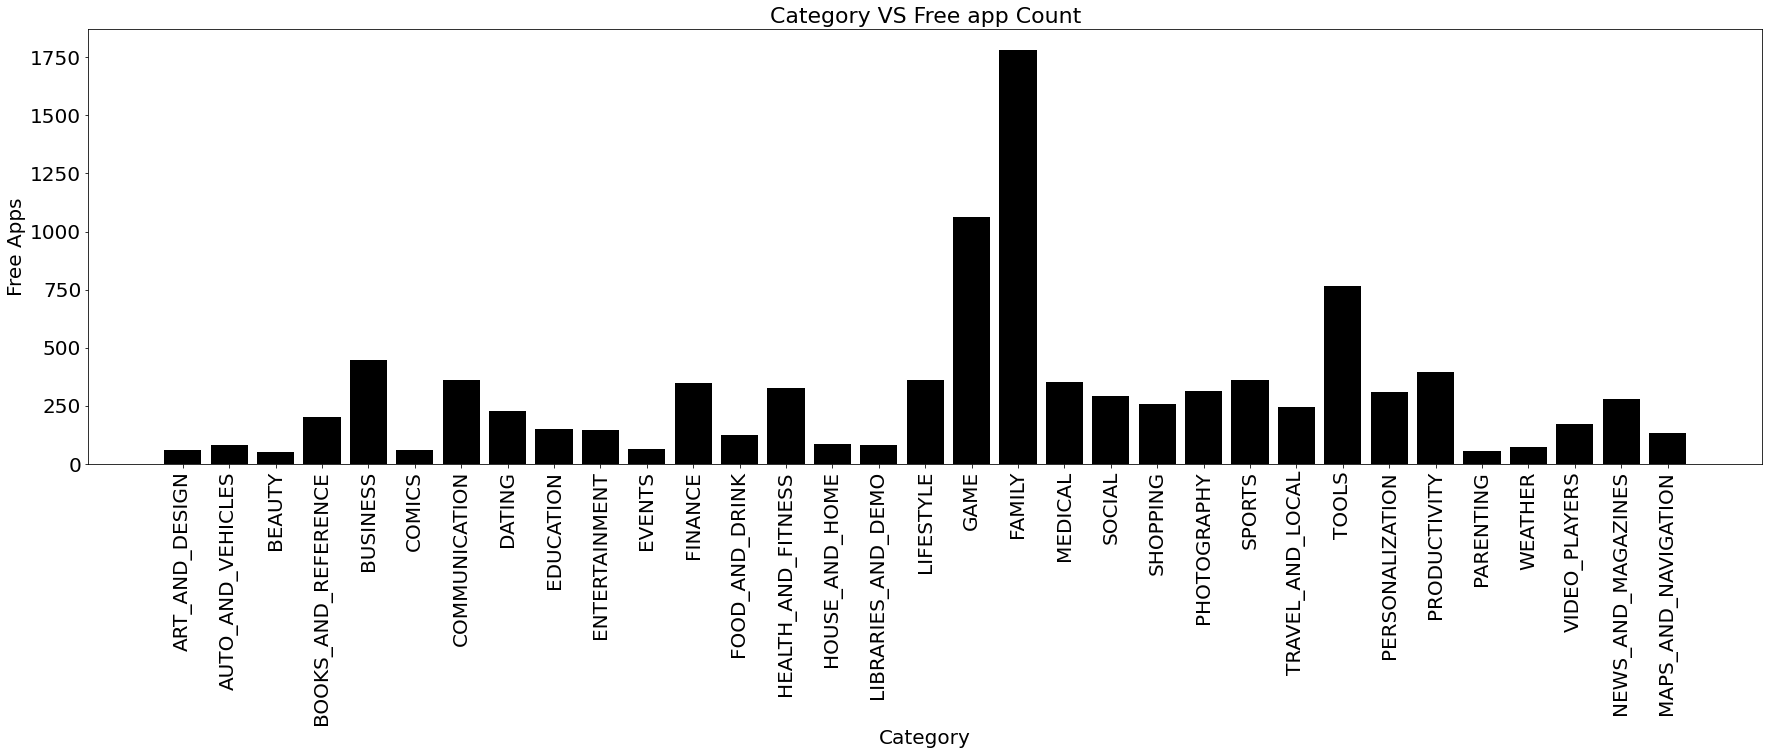

In [95]:
# 'Category VS Free app Count'
plt.bar(x = categList, height=free_list, color = 'Black')
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20, rotation=0)
plt.xlabel('Category', fontsize=20 )
plt.ylabel('Free Apps', fontsize=20)
plt.title('Category VS Free app Count', fontsize=22)
plt.show


**Top Free apps count in each category:**
 - Rank - 1: FAMILY
 - Rank - 2: GAME
 - Rank - 3: TOOLS 

<function matplotlib.pyplot.show(close=None, block=None)>

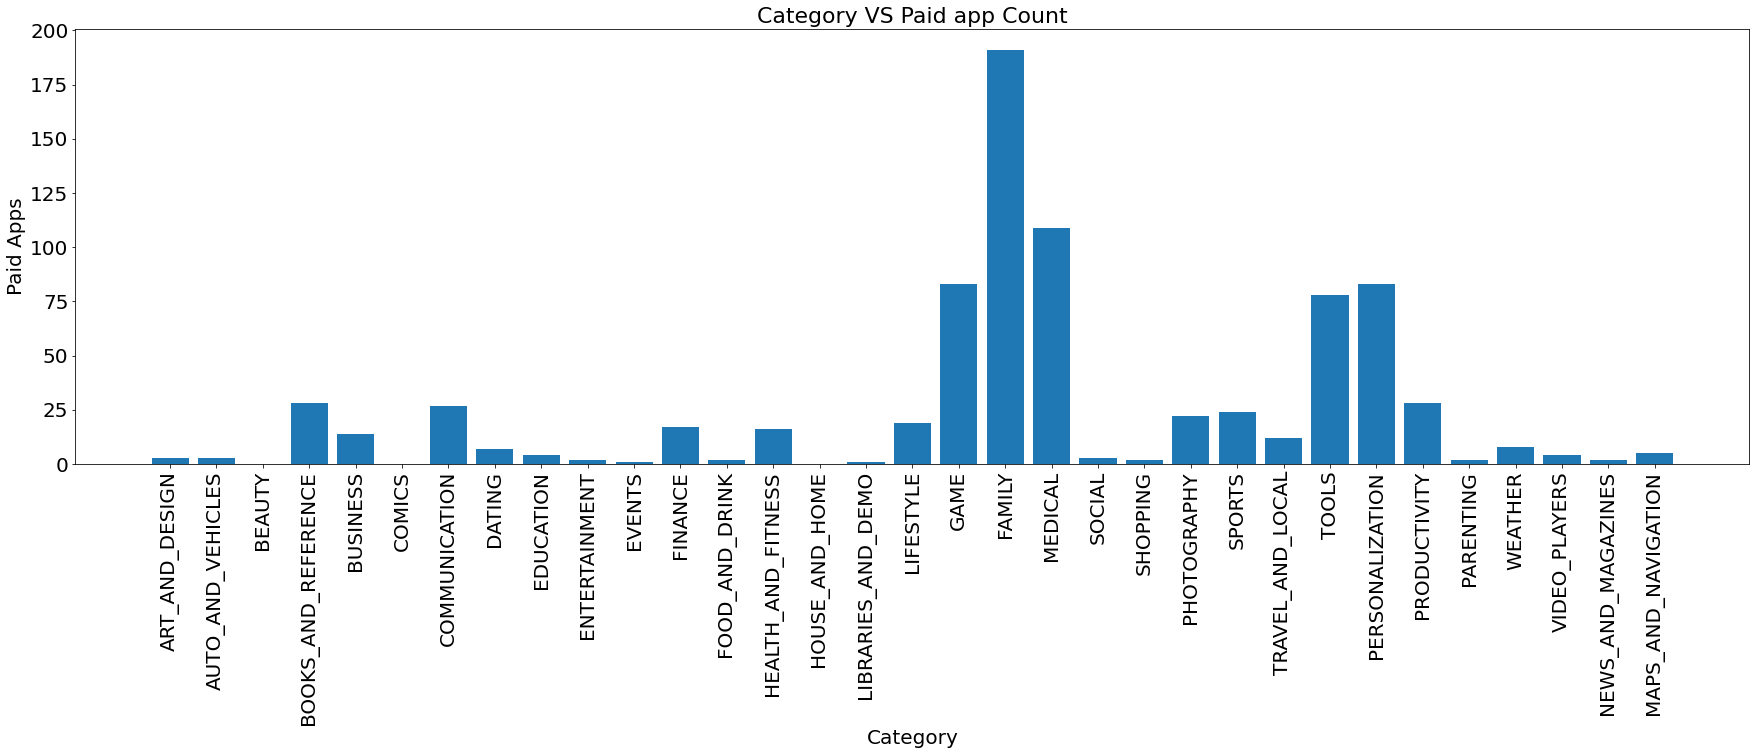

In [84]:
# 'Category VS Paid app Count'
plt.bar(x = categList, height=paid_list)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20, rotation=0)
plt.xlabel('Category', fontsize=20 )
plt.ylabel('Paid Apps', fontsize=20)
plt.title('Category VS Paid app Count', fontsize=22)
plt.show


**Top PAID apps count in each category:**
 - Rank - 1: FAMILY
 - Rank - 2: MEDICAL
 - Rank - 3: PERSONALIZATION
 - RANK - 4: GAME & TOOLS
 - RANK - 5: COMICS

### Ques 7:
#### Count of Avg Reviews in each category?

In [85]:
df.reviews.unique()

array([   159,    967,  87510, ...,    603,   1195, 398307])

In [86]:
# Count of avg reviews of each category

categList = df.category.unique()
avg_review_list = []

for i in categList:
    x = df.groupby('category').get_group(i)
    avg_review_list.append(round(mean(x.reviews)))

print("Catgeories: \n", categList)
print("\n")
print("Avegrage reviews of all catgeory: \n",avg_review_list)


# print(paid_list)

Catgeories: 
 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Avegrage reviews of all catgeory: 
 [26376, 13690, 7476, 95061, 30336, 56388, 2107138, 31159, 253819, 397169, 2516, 47953, 69947, 111125, 45186, 12201, 33725, 1385859, 208026, 3425, 2105903, 442466, 637363, 184454, 242705, 324063, 227924, 269144, 15972, 178107, 630744, 192229, 223790]


<function matplotlib.pyplot.show(close=None, block=None)>

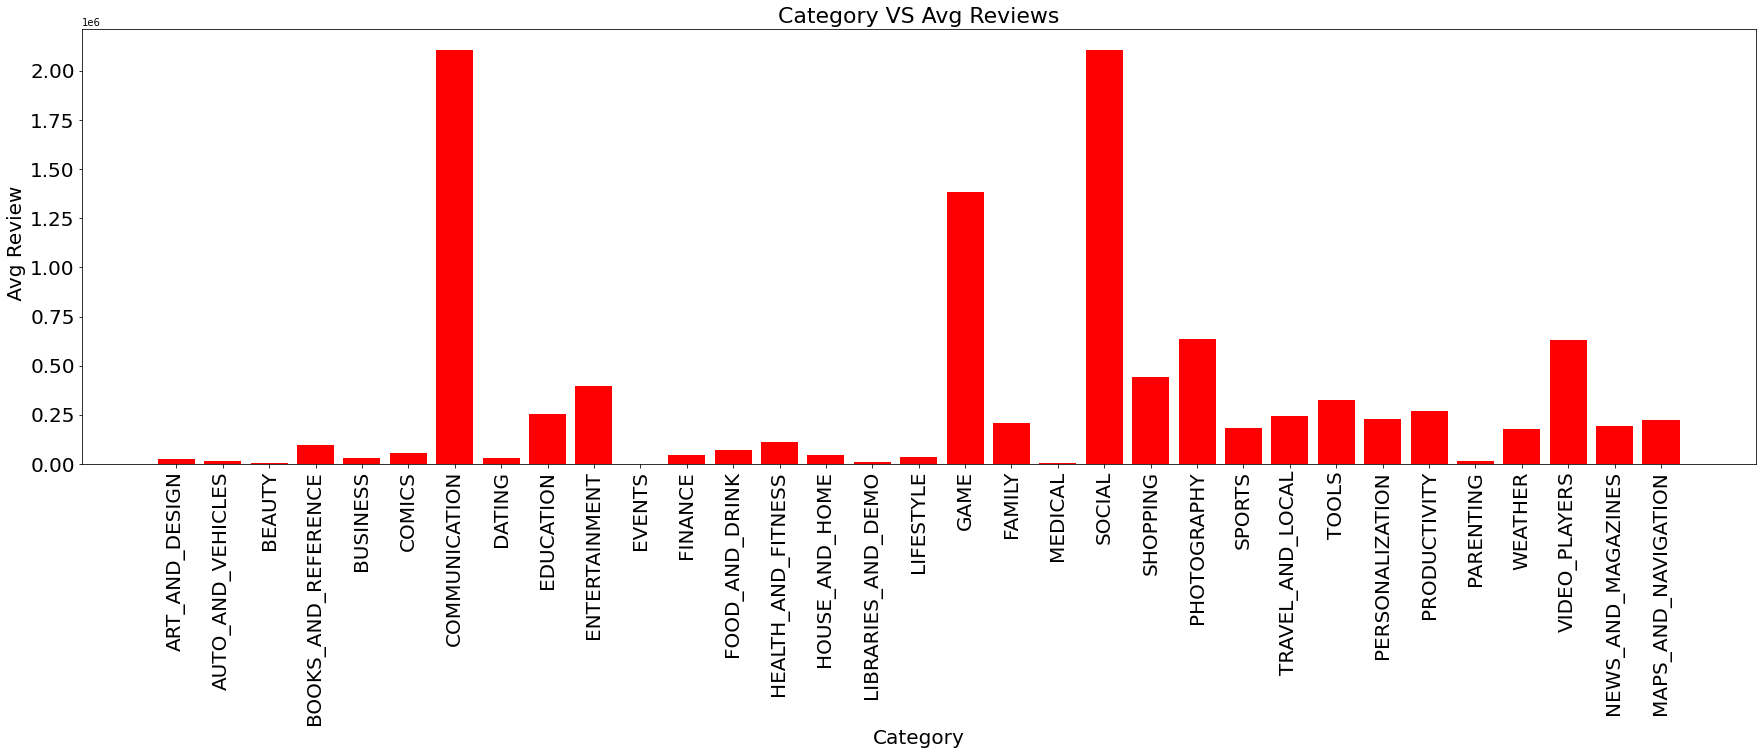

In [87]:
y_value = avg_review_list
x_value = categList

plt.bar(x = x_value , height= y_value, color='orange')
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20, rotation=0)
plt.xlabel('Category', fontsize=20)
plt.ylabel(' Avg Review', fontsize=20)
plt.title('Category VS Avg Reviews', fontsize=22)
plt.show

### Observation:
Top  Avg reviews of the category:
 - Rank - 1: SOCIAL
 - Rank - 2: COMMUNICATION
 - Rank - 3: GAME

 

# Relationships

In [90]:
# all these list are taken from previous observation / visualizations

# type --> [Free , paid]
# rating --> [top, avg, min] 

# Category list
categList

# paid app list
paid_list 

# free app list
free_list

# avg installs list
inst_list

# app count list in each category
appCount_list

# top rating category list
top_list

# avg rating category list
avg_list

# minimum rating category list
min_list

# Avg reviews list of all the category
avg_review_list


# get the list of tuples from two lists.
# and merge them by using zip().
list_of_tuples = list(zip(categList, free_list, paid_list, appCount_list, top_list, avg_list, min_list, avg_review_list, inst_list))

relation_df = pd.DataFrame(list_of_tuples, columns=['category', 'Free apps','Paid apps', 'App count','Top rating',
                                              'Avg rating', 'Min rating', 'Avg reviews', 'Avg installs'])

relation_df.head()



,category,Free apps,Paid apps,App count,Top rating,Avg rating,Min rating,Avg reviews,Avg installs
0,ART_AND_DESIGN,62,3,65,58,7,0,26376,1912894
1,AUTO_AND_VEHICLES,82,3,85,67,16,2,13690,625061
2,BEAUTY,53,0,53,46,7,0,7476,513152
3,BOOKS_AND_REFERENCE,203,28,231,202,28,1,95061,8318050
4,BUSINESS,446,14,460,380,63,15,30336,2178076


In [91]:
# save the excel into the existing jupter python code directory
relation_df.to_excel('relationship_dataframe.xlsx', index = True)


In [92]:
relation_df.corr('spearman')

,Free apps,Paid apps,App count,Top rating,Avg rating,Min rating,Avg reviews,Avg installs
Free apps,1.000000,0.813409,0.985374,0.979193,0.858674,0.788356,0.460767,0.485669
Paid apps,0.813409,1.000000,0.847078,0.842496,0.697232,0.634205,0.346013,0.374164
App count,0.985374,0.847078,1.000000,0.993983,0.846863,0.759034,0.450944,0.472673
Top rating,0.979193,0.842496,0.993983,1.000000,0.806058,0.734083,0.450201,0.473262
Avg rating,0.858674,0.697232,0.846863,0.806058,1.000000,0.821559,0.364291,0.394077
Min rating,0.788356,0.634205,0.759034,0.734083,0.821559,1.000000,0.155361,0.192006
Avg reviews,0.460767,0.346013,0.450944,0.450201,0.364291,0.155361,1.000000,0.948529
Avg installs,0.485669,0.374164,0.472673,0.473262,0.394077,0.192006,0.948529,1.000000


## Observation:

### **In Free and Paid apps:**
 - Free apps tends to have more installs as compared to Paid apps.
 
 - Free apps shows up realy good relationship with App count, rating as compared to paid apps. We can easily say that Free apps have larger number of app count thus produces more no.of rating and reviews hence bringing more installs as compared to paid apps.
 
 - Paid apps does shows up little difference in relationship with other component hence affecting the installs.
 
 - Ratings affecting the Avg reviews, App count hence the Avg installs also. More the ratings, more will be the reviews, more will be the apps in that category and hence more people will install that category.
 



### A Question arises,  Which type of app(Free / Paid) does play store should focuses on?
 - Well the ansewer to this depends upon the quality of the app.
 - More oftenly people do prefer Free apps over Paid apps, this has its own merits and demerits.
 
 - So as per the data analysis Number of installs is higly correlated with reviews, So the top category on which  developers and Google Play Store should focus on is:
        - Rank - 1: Social
        - Rank - 2: Communication
        - Rank - 3: Game
        - Rank - 4: Video Player & Photography
**NOTE:** Above category does not matches with Top category of Free / Paid apps at all. Hence we can say for the developers focus should be on quality of the product which can lead to the postive impact over the installs, but with this we cannot deny with the fact that Free apps are more prefered over Paid apps. 

In [93]:
# save the excel into the existing jupter python code directory
df.to_excel('updated_Apps.xlsx')

In [94]:
df.head()

,index,app,category,rating,reviews,size,installs,type,price,content_rating,last_update,current_ver,android_Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,2018,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,2017,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,2018,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,2018,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,2018,1.1,4.4 and up
